LOOM VIDEO LINK: https://www.loom.com/share/6b26e5c0d733411994eabf59e088eb7f?sid=219819d4-245a-4f1d-85ca-405829e4b83e

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from math import comb, log, ceil

Task 1: The probability of winning the lottery is discrete because it involves counting the number of successful outcomes from a limited set of possible outcomes.

In [8]:
def probability_of_winning():
    total_combinations = comb(51, 6)
    return 1 / total_combinations

# Calculating the probability
prob_win = probability_of_winning()
print(f"Probability of winning: {prob_win}")

Probability of winning: 5.552637336155554e-08


Task 2: Alexandra buys one lottery ticket every day for 80 years, spending a lot of money with the hope of winning at least once. By calculating the chances of not winning each day over 80 years and then finding the opposite, we see her chance of winning at least once is about 0.001. Over her lifetime, she spends $146,000 on tickets. A graph of this data shows her probability of winning increases very slowly, while her spending goes up quickly, showing a big financial cost against very low odds of winning.

Probability of Alexandra winning at lease once: 0.0016200564374689863
Total amount of money spent by Alexandra: $146000


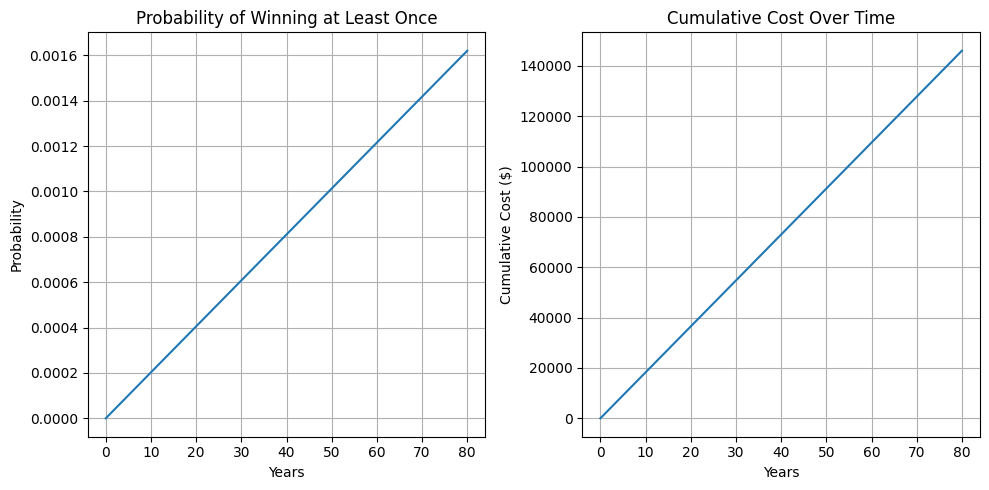

In [9]:
def alexandra_probability_and_cost(prob_win):
    years = 80
    days_per_year = 365
    days = days_per_year * years
    ticket_cost = 5
    total_cost = ticket_cost * days
    
    prob_not_win = (1 - prob_win) ** days
    prob_win_at_least_once = 1 - prob_not_win
    
    return prob_win_at_least_once, total_cost

# Calculating the probability and cost
alexandra_prob, alexandra_cost = alexandra_probability_and_cost(prob_win)

print(f"Probability of Alexandra winning at lease once: {alexandra_prob}")
print(f"Total amount of money spent by Alexandra: ${alexandra_cost}")

# Generating data to display as a visual
days = np.arange(1, 80 * 365 + 1)
cumulative_prob_no_win = (1 - prob_win) ** days
cumulative_prob_win = 1 - cumulative_prob_no_win
cumulative_cost = days * 5

# My visuals
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(days / 365, cumulative_prob_win)
plt.title("Probability of Winning at Least Once")
plt.xlabel('Years')
plt.ylabel('Probability')
plt.grid(True)

# Plotting the cumulative cost
plt.subplot(1, 2, 2)
plt.plot(days / 365, cumulative_cost)
plt.title('Cumulative Cost Over Time')
plt.xlabel('Years')
plt.ylabel('Cumulative Cost ($)')
plt.grid(True)

plt.tight_layout()
plt.show()

Task 3: To increase his chances of winning the lottery, Amir thinks about forming a group with his friends. He calculates how many friends he needs to reach a certain chance of winning, for different target probabilities. For a winning chance of 0.00001, he needs about 181 friends. For a winning chance of 0.001, he needs about 18,019 friends. For a winning chance of 0.1, he needs about 1,897,486 friends. For a winning chance of 0.5, he needs about 12,483,207 friends. These numbers show how the required number of people goes up a lot as the chance of winning gets higher.

Minimum number of friends required for each epsilon:
Epsilon: 1e-05, Friends: 181
Epsilon: 0.001, Friends: 18019
Epsilon: 0.1, Friends: 1897486
Epsilon: 0.5, Friends: 12483207


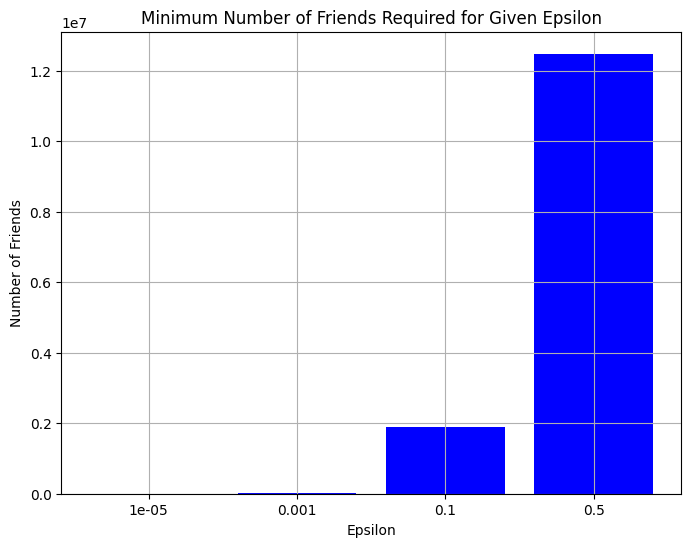

In [10]:
def minimum_friends(prob_win, epsilon):
    N = ceil(log(1 - epsilon) / log(1 - prob_win))
    return N

# Calculate N for various epsilons
epsilons = [1e-5, 1e-3, 0.1, 0.5]
friends_required = [minimum_friends(prob_win, epsilon) for epsilon in epsilons]

print("Minimum number of friends required for each epsilon:")
for epsilon, friends in zip(epsilons, friends_required):
    print(f"Epsilon: {epsilon}, Friends: {friends}")

# Plot the number of friends required for each epsilon
plt.figure(figsize=(8, 6))
plt.bar([str(epsilon) for epsilon in epsilons], friends_required, color='blue')
plt.title('Minimum Number of Friends Required for Given Epsilon')
plt.xlabel('Epsilon')
plt.ylabel('Number of Friends')
plt.grid(True)
plt.show()

Task 4: If Amir and his friends want to increase their chances of winning without adding more people, they could pick different sets of numbers for each ticket. This way, they avoid having overlapping tickets and cover more possible outcomes.

In [11]:
def diversify_tickets(friends_count, num_combinations):
    from itertools import combinations
    all_combinations = list(combinations(range(1, 52), 6))
    unique_combinations = all_combinations[:friends_count]
    return unique_combinations

# Suppose Amir has N friends ensuring P(win) >= 0.5
epsilon_05 = 0.5
N_05 = minimum_friends(prob_win, epsilon_05)

# Generate diversified tickets for N friends
diversified_tickets = diversify_tickets(N_05, comb(51, 6))
print(f"Number of unique tickets generated: {len(diversified_tickets)}")

Number of unique tickets generated: 12483207


Task 5: The state lottery now offers a consolation prize for matching exactly 3 out of 6 numbers, hoping to get more people interested. The chance of winning this smaller prize is about 0.015, and the expected value is $157k. This makes it more likely that players will win something, though it's unclear if this will greatly increase ticket sales, but it doesn’t seem like it would make the lottery more appealing overall.


Probability of winning the consolation prize: 0.015758384760009462
Expected value of the consolation prize: $157583.84760009462


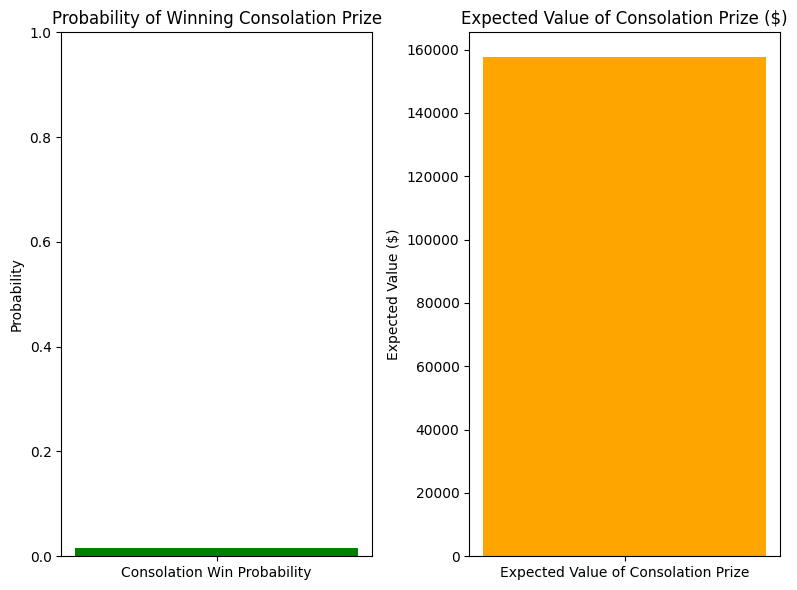

In [12]:
def probability_of_consolation():
    matches_3 = comb(6, 3)
    not_matches_3 = comb(45, 3)
    total_combinations = comb(51, 6)
    return (matches_3 * not_matches_3) / total_combinations

def expected_value_of_consolation(prize_amount):
    prob_consolation = probability_of_consolation()
    expected_value = prob_consolation * prize_amount
    return prob_consolation, expected_value

# Suppose the consolation prize is $10,000,000
consolation_prize_amount = 10000000
consolation_prob, consolation_expected_value = expected_value_of_consolation(consolation_prize_amount)

print(f"Probability of winning the consolation prize: {consolation_prob}")
print(f"Expected value of the consolation prize: ${consolation_expected_value}")

# Bar chart for probability and expected value
plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
plt.bar(['Consolation Win Probability'], [consolation_prob], color='green')
plt.title('Probability of Winning Consolation Prize')
plt.ylim(0, 1)
plt.ylabel('Probability')

plt.subplot(1, 2, 2)
plt.bar(['Expected Value of Consolation Prize'], [consolation_expected_value], color='orange')
plt.title('Expected Value of Consolation Prize ($)')
plt.ylabel('Expected Value ($)')

plt.tight_layout()
plt.show()